# Simple orders analysis

🚀 We are finally ready to start analysing our `orders` dataset!

Our objective is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [1]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=False)
orders

,order_id,order_status,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_sellers,price,freight_value,number_of_products
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,8.436574,15.544063,0.0,0,0,4,1,29.99,8.72,1
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,13.782037,19.137766,0.0,0,0,4,1,118.70,22.76,1
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,9.394213,26.639711,0.0,1,0,5,1,159.90,19.22,1
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,13.208750,26.188819,0.0,1,0,5,1,45.00,27.20,1
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2.873877,12.112049,0.0,1,0,5,1,19.90,8.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,delivered,8.218009,18.587442,0.0,1,0,5,1,72.00,13.08,1
96357,63943bddc261676b46f01ca7ac2f7bd8,delivered,22.193727,23.459051,0.0,0,0,4,1,174.90,20.10,1
96358,83c1379a015df1e13d02aae0204711ab,delivered,24.859421,30.384225,0.0,1,0,5,1,205.99,65.02,1
96359,11c177c8e97725db2631073c19f07b62,delivered,17.086424,37.105243,0.0,0,0,2,1,359.98,81.18,2


In [8]:
# Check your shape below

# Shape if you set with_distance_seller_customer=True
if orders.shape[1] == 13: 
    assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False    
else:  
    assert(orders.shape == (96353, 12))

## 1 - Inspect features

👉 Print summary statistics of each column of the order dataset (then focus in particular on `wait_time`)

In [12]:
# YOUR CODE HERE
print(orders.describe())
print(orders['wait_time'].describe())

          wait_time  expected_wait_time  delay_vs_expected  dim_is_five_star  \
count  96353.000000        96353.000000       96353.000000      96353.000000   
mean      12.522869           23.741881           0.754903          0.592187   
std        9.457183            8.759019           4.656481          0.491431   
min        0.533414            2.008009           0.000000          0.000000   
25%        6.763530           18.335243           0.000000          0.000000   
50%       10.211944           23.233113           0.000000          1.000000   
75%       15.685278           28.411979           0.000000          1.000000   
max      208.351759          155.135463         188.975081          1.000000   

       dim_is_one_star  review_score  number_of_sellers         price  \
count     96353.000000  96353.000000       96353.000000  96353.000000   
mean          0.097610      4.155688           1.013918    136.654623   
std           0.296788      1.284979           0.123616    2

📈 Plot histograms to get a sense of the distribution of each numerical feature.

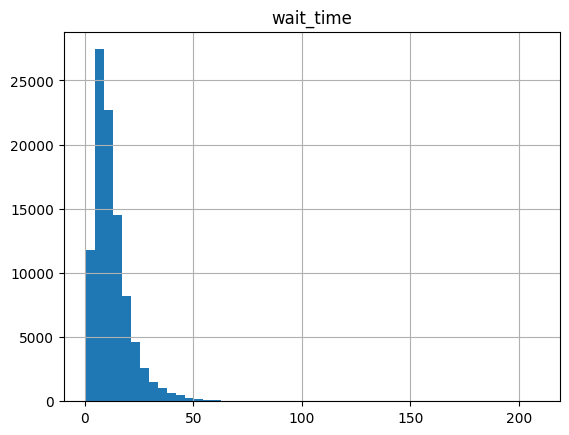

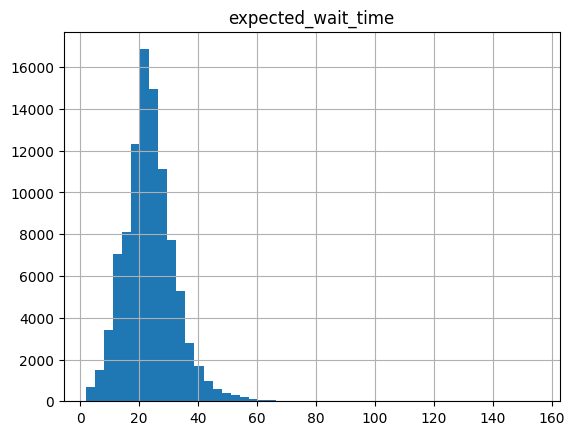

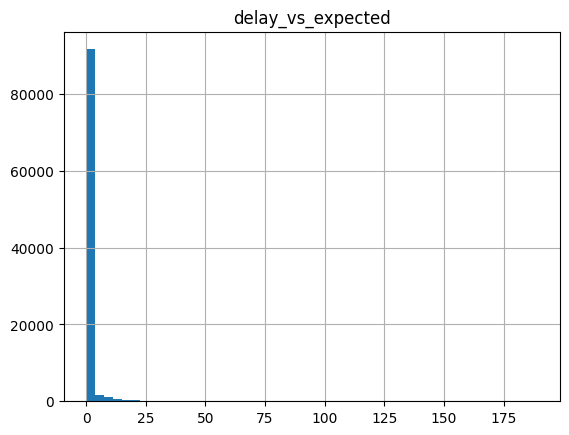

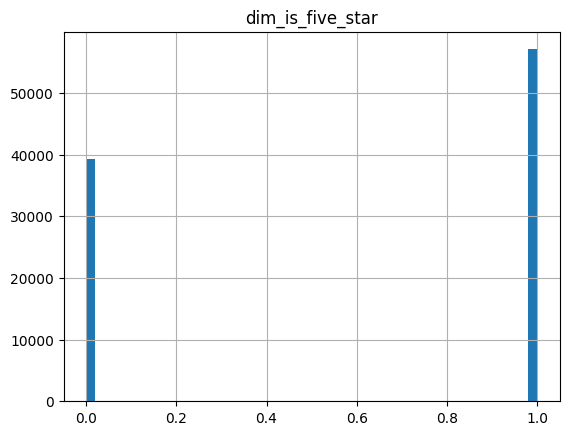

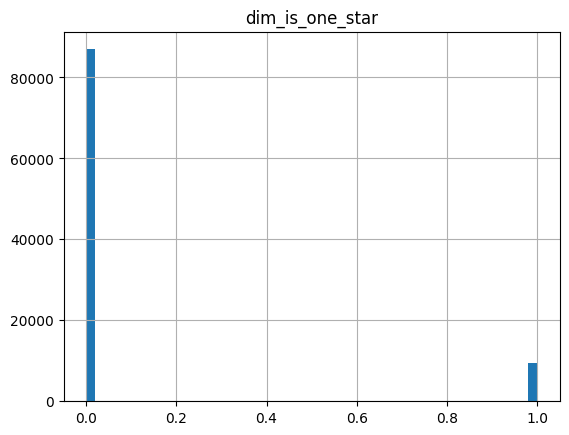

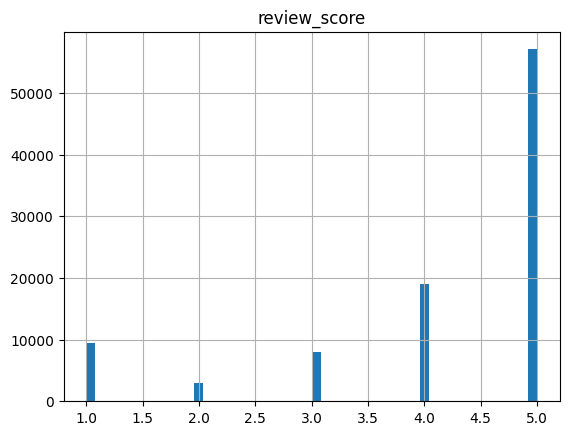

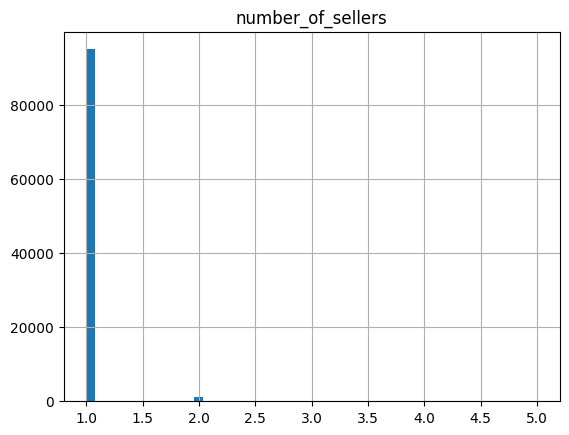

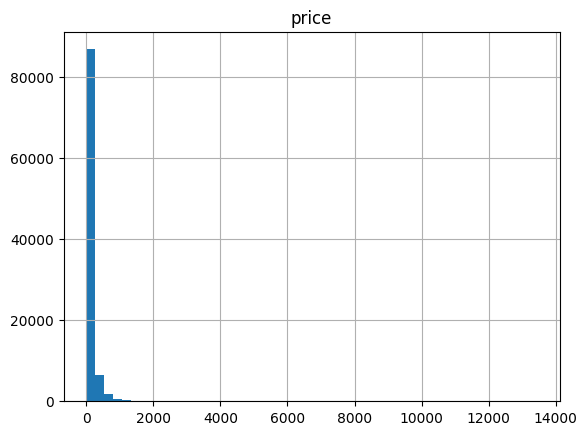

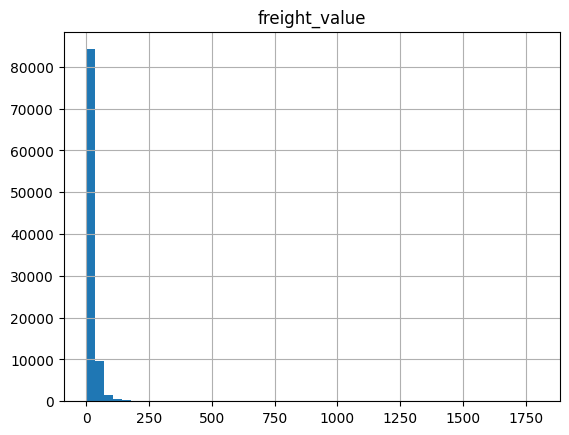

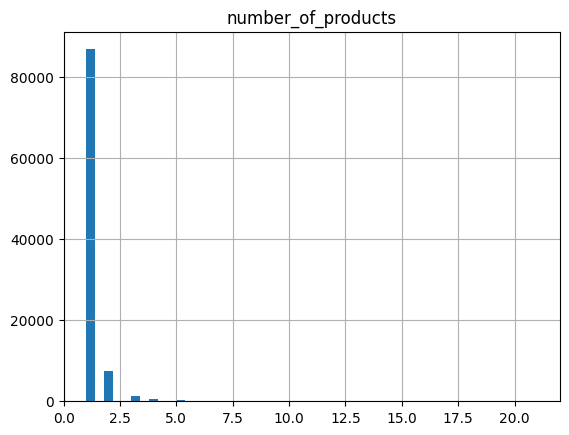

In [20]:
# YOUR CODE HERE
# Select all numerical columns
num_cols = ["wait_time","expected_wait_time","delay_vs_expected","dim_is_five_star","dim_is_one_star","review_score","number_of_sellers","price","freight_value","number_of_products"]

# Plot a histogram for each column
for col in num_cols:
    orders[col].hist(bins=50)
    plt.title(col)
    plt.show()



👀 In particular, create a `sns.FacetGrid()` of histograms for each `review_score` vs. `wait_time`

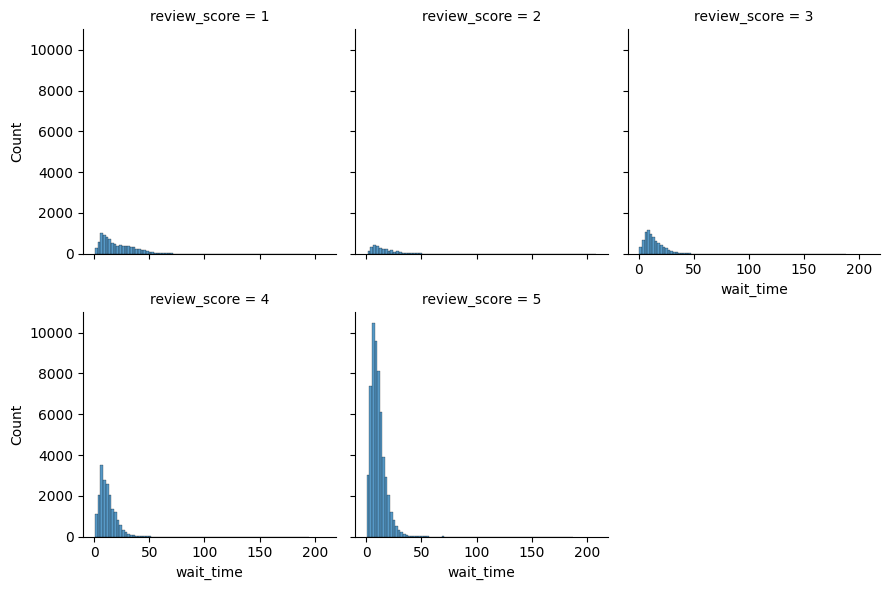

In [37]:
# YOUR CODE HERE
# Select relevant columns
df = orders[['review_score', 'wait_time']]

# Create a FacetGrid of histograms
g = sns.FacetGrid(data = df, col='review_score', col_wrap=3, height=3, sharex=True)
g.map(sns.histplot, 'wait_time', bins=80)


❓ What do you notice for the variables `price` and `freight_value` ? 

❓ Have a look at the  `distance_seller_customer` feature if you have created it in `order.py`

In [ ]:
# YOUR CODE HERE

❓Inspect the various correlations between features: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Hint</summary>

* Use `DataFrame.corr()` combined with `sns.heatmap()` and `cmap='coolwarm'`
* Have a look at the absolute values of the correlation coefficients of `review_score` vs. each feature,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

review_score          1.000000
dim_is_one_star       0.807700
dim_is_five_star      0.791787
wait_time             0.333758
delay_vs_expected     0.272281
number_of_products    0.123492
number_of_sellers     0.116942
freight_value         0.090013
expected_wait_time    0.052410
price                 0.034742
Name: review_score, dtype: float64


<AxesSubplot:>

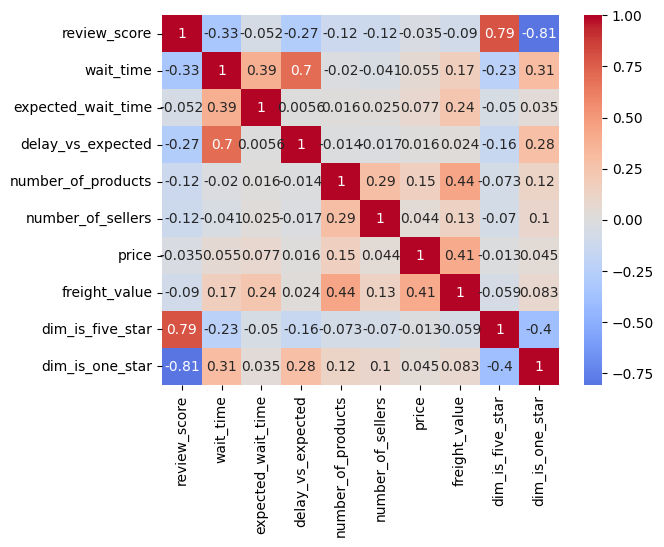

In [39]:
# YOUR CODE HERE
# Select relevant columns
cols = ['review_score', 'wait_time', 'expected_wait_time', 'delay_vs_expected', 'number_of_products', 'number_of_sellers', 'price', 'freight_value',"dim_is_five_star","dim_is_one_star"]

# Create a correlation matrix
corr = orders[cols].corr()

# Print the absolute correlation coefficients between review_score and each feature
print(corr['review_score'].abs().sort_values(ascending=False))

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True, center=0)

* 😏 _Captain Obvious :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : - 27 %

## 2 - Simple regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (- 27%).

🎨 Let's investigate these correlations  with `seaborn`

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Tips</u>:

- Reduce your dataframe to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- Use `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed
- Use `sns.regplot()` to plot the `regression lines`
- Add some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers

Text(0.5, 1.0, 'Review score vs. Delay vs. expected')

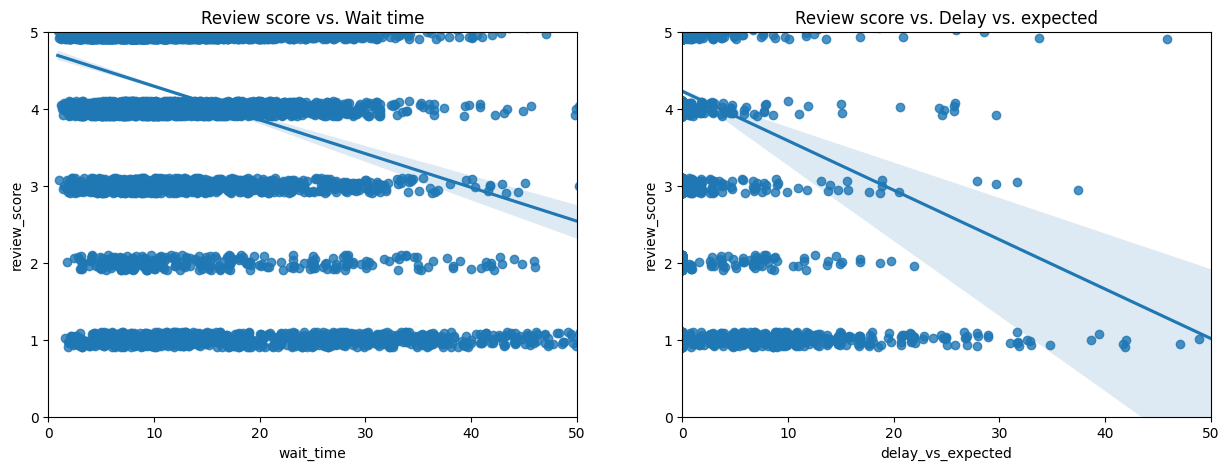

In [40]:
# YOUR CODE HERE
# Reduce your dataframe to a random sub-sample of 10,000 rows for speed purposes
df_sample = orders.sample(n=10000, random_state=42)

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# First subplot: regress review_score on wait_time
sns.regplot(x="wait_time", y="review_score", data=df_sample, ax=ax1, y_jitter=0.1)
ax1.set_xlim([0, 50])  # Limit xlim to hide outliers
ax1.set_ylim([0, 5])  # Limit ylim to hide outliers
ax1.set_title("Review score vs. Wait time")

# Second subplot: regress review_score on delay_vs_expected
sns.regplot(x="delay_vs_expected", y="review_score", data=df_sample, ax=ax2, y_jitter=0.1)
ax2.set_xlim([0, 50])  # Limit xlim to hide outliers
ax2.set_ylim([0, 5])  # Limit ylim to hide outliers
ax2.set_title("Review score vs. Delay vs. expected")

In [ ]:
# YOUR CODE HERE

ℹ️ What did `regplot` do ? 

👉 It tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp` <br/> *(Cf. Day 03 - Linear Regression tomorrow)*

🧐 It doesn't look so interpretable, does it ?

👉 You are right: we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - Well, not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓Try to visually "compute" the `slope` of each curve. 

✍️ Write down, in plain English, how you would interpret these coefficients if you were to explain it to a non-data-educated audience.

> YOUR ANSWER HERE
to get high rating, first of all, product should be delivered as soon as possible. best practice is before the expected delivery date. before the expected product delivery date expires, relation between is waiting time and review score doesnt change drastically, if the product deivery is delayes , the more it delays after the expectation dated expires, review score comes down rapidly . 

<details>
    <summary>▸ Answer</summary>


- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ Are you surprised that the delay seems more impactful than the waiting time ? 
    
👉If yes, think about it twice: you may be impatient to receive your order and would like a small wait time, but you would be even more disappointed to receive your package after the expected delivery date !
        
</details>

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` to visualize the two confidence intervals:
- Change the `size of your sample dataset`: 
    - Notice how the slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- Change the `size of the confidence interval` by playing with the regplot parameter called `ci` (95% by default)

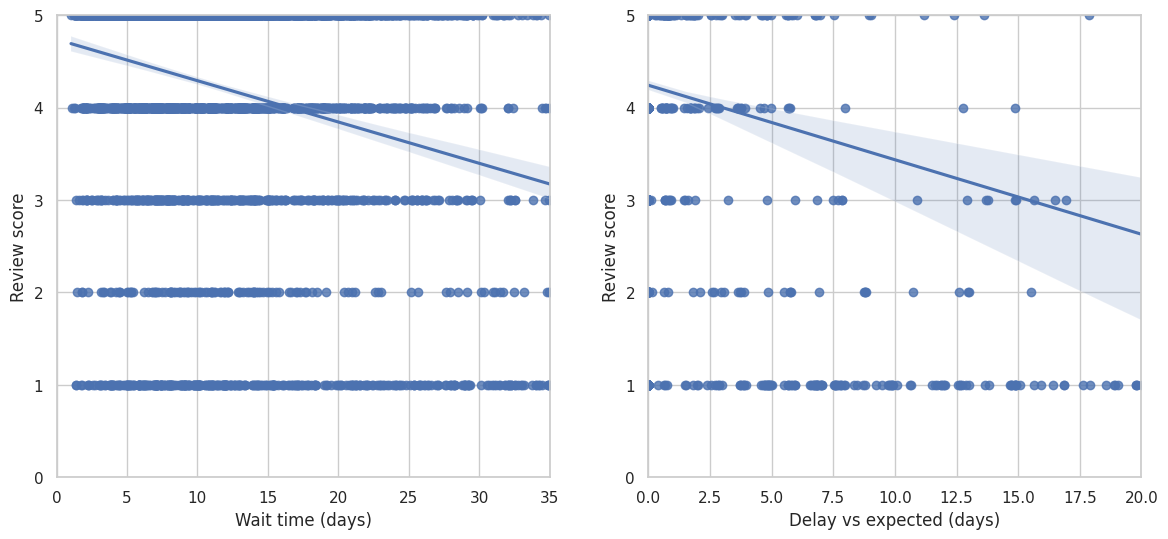

In [42]:
# YOUR CODE HERE
# Reduce your dataframe to a random sub-sample of 5,000 rows for speed purposes
orders_sample = orders.sample(n=5000, random_state=1)

# Plot two subplots for review_score vs. wait_time and delay_vs_expected, respectively
sns.set(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

sns.regplot(x='wait_time', y='review_score', data=orders_sample, ax=ax1, ci=99)
ax1.set_xlim([0, 35])
ax1.set_ylim([0, 5])
ax1.set_xlabel('Wait time (days)')
ax1.set_ylabel('Review score')

sns.regplot(x='delay_vs_expected', y='review_score', data=orders_sample, ax=ax2, ci=99)
ax2.set_xlim([0, 20])
ax2.set_ylim([0, 5])
ax2.set_xlabel('Delay vs expected (days)')
ax2.set_ylabel('Review score')

plt.show()

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the impact of delivery time on review scores is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

🗓 Cf. `Lecture 3 - Linear Regression` : we will talk about **`multivariate linear regression`**. 
</details>



---
🏁 Congratulations! 

🙏 Don't forget to `commit` and `push` your notebook